In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
# https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction
df = pd.read_csv('booking.csv')

#### Understanding the Dataset

In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Checking the size

In [4]:
df.shape

(36285, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
# repeated -> Indicates whether the booking is a repeat booking
# P-C ->Number of previous bookings that were canceled by the customer prior to the current booking
# P-not-C -> Number of previous bookings not canceled by the customer prior to the current booking
# lead time -> Number of days between the booking date and the arrival date
# market segment type -> Online/Offline

In [7]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Checking for null values

In [8]:
print(df.isnull().sum().sort_values(ascending=False))

Booking_ID                  0
market segment type         0
date of reservation         0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
lead time                   0
number of adults            0
room type                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
booking status              0
dtype: int64


In [9]:
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [10]:
pd.Series({c: df[c].unique() for c in df[['number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'special requests',
       'booking status']]}) 

number of adults                                              [1, 2, 3, 0, 4]
number of children                                        [1, 0, 2, 3, 10, 9]
number of weekend nights                             [2, 1, 0, 4, 3, 6, 5, 7]
number of week nights       [5, 3, 2, 4, 0, 1, 10, 6, 11, 7, 15, 9, 13, 8,...
type of meal                [Meal Plan 1, Not Selected, Meal Plan 2, Meal ...
car parking space                                                      [0, 1]
room type                   [Room_Type 1, Room_Type 4, Room_Type 2, Room_T...
market segment type         [Offline, Online, Corporate, Aviation, Complem...
repeated                                                               [0, 1]
P-C                                             [0, 3, 1, 2, 11, 4, 5, 13, 6]
P-not-C                     [0, 5, 1, 3, 4, 12, 19, 2, 15, 17, 7, 20, 16, ...
special requests                                           [0, 1, 3, 2, 4, 5]
booking status                                       [Not_Cancel

In [11]:
# Could be a problem
# Sample numbers is not evenly distrubuted
# That can cause the model the classify not cancelled when even it is not
df["booking status"].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

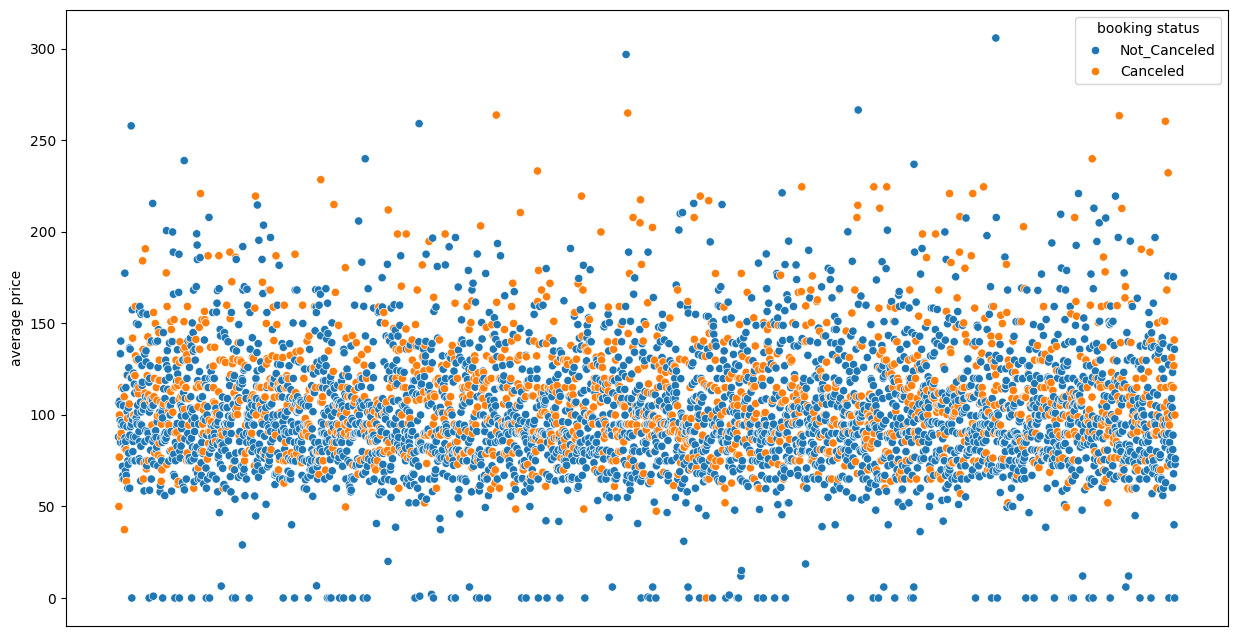

In [12]:
# Could be a problem
# Because data is large data viz took more time and could be concluded to a memory problem
plt.figure(figsize=(15,8))
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
sns.scatterplot(data=df[0:5000],
                x="Booking_ID",
                y="average price",
                hue='booking status'
                )
plt.show()

### TODO:
1. Preprocessing data +
    - Change column names+
    - Change datatypes (date, categorical)+
    - Handle outliers+
    - Create new variables+
        - Booking date, booking month etc.+

2. Data visualization
    - Histogram, line plot etc.+
    - Visualize the distrubiton of data+

3. Examine the relationship between variables and visualize
    - Scatter plot, heatmap
    - Find the correlation between variables+
        - Is there a relationship between number of children and meal type
        - Is there a relationship between booking month and prices
    - Choose the features that have high correlation with cancellation 

4. Modelling for cancellation prediction
    - Logistic Regression, KNN, Decision Tree, SVM
        - Encoding categorical data+
        - Normalizing data
        - Train/test split
        - Train the model
        - Test the model and evalute
            - Confusion Matrix
            - Classification Report
        - Compare results

